In [8]:
import pydot

from IPython.display import Image, display

def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

In [ ]:
models = {
    'Drupal Node': [
        'Assay': {
            'Species': ['speciesReference': 'str value', 'stoichiometry': 'int value']
        }
    ]
}

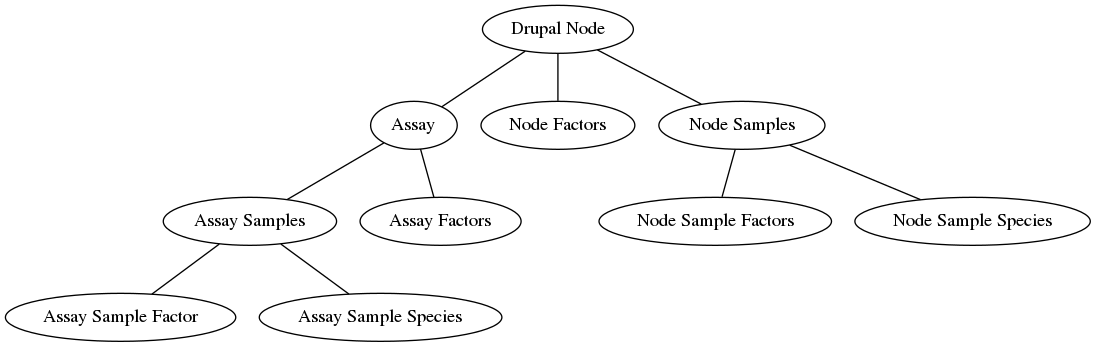

In [30]:
drupal_node = pydot.Dot(graph_type='graph')

drupal_node.add_edge(pydot.Edge('Drupal Node', 'Assay'))
drupal_node.add_edge(pydot.Edge('Drupal Node', 'Node Factors'))
drupal_node.add_edge(pydot.Edge('Drupal Node', 'Node Samples'))
drupal_node.add_edge(pydot.Edge('Node Samples', 'Node Sample Factors'))
drupal_node.add_edge(pydot.Edge('Node Samples', 'Node Sample Species'))


drupal_node.add_edge(pydot.Edge('Assay', 'Assay Samples'))
drupal_node.add_edge(pydot.Edge('Assay', 'Assay Factors'))
drupal_node.add_edge(pydot.Edge('Assay Samples', 'Assay Sample Factor'))
drupal_node.add_edge(pydot.Edge('Assay Samples', 'Assay Sample Species'))



viewPydot(drupal_node)